# Lab 2: Arrays and Visualizations

Please complete this lab by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

This assignment is due by **11:59pm on Thursday, February 20**.

In [2]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots

## Arrays

Computers are most useful when you can use a small amount of code to *do the same action* to *many different things*.

For example, in the time it takes you to calculate the 18% tip on a restaurant bill, a laptop can calculate 18% tips for every restaurant bill paid by every human on Earth that day.  (That's if you're pretty fast at doing arithmetic in your head!)

**Arrays** are how we put many values in one place so that we can operate on them as a group. For example, if `billions_of_numbers` is an array of numbers, the expression

    .18 * billions_of_numbers

gives a new array of numbers that contains the result of multiplying each number in `billions_of_numbers` by .18.  Arrays are not limited to numbers; we can also put all the words in a book into an array of strings.

Concretely, an array is a **collection of values of the same type**, like a column in an Excel spreadsheet. 

<img src="excel_array.jpg">

## Making arrays
You can type in the data that goes in an array yourself, but that's not typically how programs work. Normally, we create arrays by loading them from an external source, like a data file.

First, though, let's learn how to do it the hard way. To create an array by hand, call the function `make_array`.  Each argument you pass to `make_array` will be in the array it returns.  Run this cell to see an example:

In [3]:
make_array(0.125, 4.75, -1.3)

array([ 0.125,  4.75 , -1.3  ])

Each value in an array (in the above case, the numbers 0.125, 4.75, and -1.3) is called an *element* of that array.

Arrays themselves are also values, just like numbers and strings.  That means you can assign them to names or use them as arguments to functions. For example, `len(<some_array>)` returns the number of elements in `some_array`.

<font color ='red'>**Question 1. Make an array containing the numbers 0, 1, -1, $\pi$, and $e$, in that order.  Name it `interesting_numbers`.**</font>

*Hint:* How did you get the values $\pi$ and $e$ previously?  You can refer to them in exactly the same way here.

In [4]:
interesting_numbers = make_array(0, 1, -1, np.pi, np.e)



interesting_numbers

array([ 0.        ,  1.        , -1.        ,  3.14159265,  2.71828183])

In [5]:
type(interesting_numbers)

numpy.ndarray

In [10]:
interesting_numbers.mean()

1.1719748964097676

###  `np.arange`
Arrays are provided by a package called [NumPy](http://www.numpy.org/) (pronounced "NUM-pie" or, if you prefer to pronounce things incorrectly, "NUM-pee").  The package is called `numpy`, but it's standard to rename it `np` for brevity.  You can do that with:

    import numpy as np

Very often in data science, we want to work with many numbers that are evenly spaced within some range.  NumPy provides a special function for this called `arange`.  The line of code `np.arange(start, stop, step)` evaluates to an array with all the numbers starting at `start` and counting up by `step`, stopping **before** `stop` is reached.

Run the following cells to see some examples!

In [11]:
# This array starts at 1 and counts up by 2
# and then stops before 6
np.arange(1, 6, 2)

array([1, 3, 5])

In [13]:
# This array doesn't contain 9
# because np.arange stops *before* the stop value is reached
np.arange(4, 10, 1)

array([4, 5, 6, 7, 8, 9])

In [14]:
# You can also use a single number to create an array of all integers from 0 to that number
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<font color = 'red'>**Question 2. Use `np.arange` to create an array with the multiples of 99 from 0 up to (**and including**) 9999 (So its elements are 0, 99, 198, 297, etc.). Assign this to `my_array`.**</font>

In [16]:
my_array = np.arange(0, 9999 + 1, 99)
my_array

array([   0,   99,  198,  297,  396,  495,  594,  693,  792,  891,  990,
       1089, 1188, 1287, 1386, 1485, 1584, 1683, 1782, 1881, 1980, 2079,
       2178, 2277, 2376, 2475, 2574, 2673, 2772, 2871, 2970, 3069, 3168,
       3267, 3366, 3465, 3564, 3663, 3762, 3861, 3960, 4059, 4158, 4257,
       4356, 4455, 4554, 4653, 4752, 4851, 4950, 5049, 5148, 5247, 5346,
       5445, 5544, 5643, 5742, 5841, 5940, 6039, 6138, 6237, 6336, 6435,
       6534, 6633, 6732, 6831, 6930, 7029, 7128, 7227, 7326, 7425, 7524,
       7623, 7722, 7821, 7920, 8019, 8118, 8217, 8316, 8415, 8514, 8613,
       8712, 8811, 8910, 9009, 9108, 9207, 9306, 9405, 9504, 9603, 9702,
       9801, 9900, 9999])

## Working with single elements of arrays ("indexing")
Let's work with a more interesting dataset.  The next cell creates an array called `population_amounts` that includes estimated world populations in every year from **1950** to roughly the present (The estimates come from the US Census Bureau website.).

Rather than type in the data manually, we've loaded them from a file called `world_population.csv`. 

In [17]:
population_amounts = Table.read_table("world_population.csv").column("Population")
population_amounts

array([2557628654, 2594939877, 2636772306, 2682053389, 2730228104,
       2782098943, 2835299673, 2891349717, 2948137248, 3000716593,
       3043001508, 3083966929, 3140093217, 3209827882, 3281201306,
       3350425793, 3420677923, 3490333715, 3562313822, 3637159050,
       3712697742, 3790326948, 3866568653, 3942096442, 4016608813,
       4089083233, 4160185010, 4232084578, 4304105753, 4379013942,
       4451362735, 4534410125, 4614566561, 4695736743, 4774569391,
       4856462699, 4940571232, 5027200492, 5114557167, 5201440110,
       5288955934, 5371585922, 5456136278, 5538268316, 5618682132,
       5699202985, 5779440593, 5857972543, 5935213248, 6012074922,
       6088571383, 6165219247, 6242016348, 6318590956, 6395699509,
       6473044732, 6551263534, 6629913759, 6709049780, 6788214394,
       6866332358, 6944055583, 7022349283, 7101027895, 7178722893,
       7256490011])

Here's how we get the first element of `population_amounts`, which is the world population in the first year in the dataset, 1950.

In [18]:
population_amounts.item(0)

2557628654

The value of that expression is the number 2557628654 (around 2.5 billion), because that's the first thing in the array `population_amounts`.

Notice that we wrote `.item(0)`, not `.item(1)`, to get the first element.  This is a weird convention in computer science.  0 is called the *index* of the first item.  It's the number of elements that appear *before* that item.  So 3 is the index of the 4th item.

Here are some more examples.  In the examples, we've given names to the things we get out of `population_amounts`.  Read and run each cell.

In [19]:
# The 13th element in the array is the population
# in 1962 (which is 1950 + 12).
population_1962 = population_amounts.item(12)
population_1962

3140093217

In [20]:
# The 66th element is the population in 2015.
population_2015 = population_amounts.item(65)
population_2015

7256490011

In [21]:
# The array has only 66 elements, so this doesn't work.
# (There's no element with 66 other elements before it.)
population_2016 = population_amounts.item(66)
population_2016

IndexError: index 66 is out of bounds for axis 0 with size 66

Since `make_array` returns an array, we can call `.item(3)` on its output to get its 4th element, just like we "chained" together calls to the method `replace` earlier.

In [22]:
make_array(-1, -3, 4, -2).item(3)

-2

<font color = 'red'>**Question 3. Set `population_1973` to the world population in 1973, by getting the appropriate element from `population_amounts` using `item`.**</font>

In [26]:
1973- 1950

23

In [25]:
population_1973 = population_amounts.item(23)

population_1973

3942096442

## Doing something to every element of an array
Arrays are primarily useful for doing the same operation many times, so we don't often have to use `.item` and work with single elements.

Here is one simple question we might ask about world population:

> How big was the population in *orders of magnitude* in each year?

Orders of magnitude quantify how big a number is by representing it as the power of another number (for example, representing 104 as $10^{2.017033}$). One way to do this is by using the logarithm function. The logarithm (base 10) of a number increases by 1 every time we multiply the number by 10. It's like a measure of how many decimal digits the number has, or how big it is in orders of magnitude.

We could try to answer our question like this, using the `log10` function from the `math` module and the `item` method you just saw:

In [27]:
population_1950_magnitude = np.log10(population_amounts.item(0))
population_1951_magnitude = np.log10(population_amounts.item(1))
population_1952_magnitude = np.log10(population_amounts.item(2))
population_1953_magnitude = np.log10(population_amounts.item(3))


In [28]:
population_1950_magnitude

9.407837488842446

But this is tedious and doesn't really take advantage of the fact that we are using a computer.

Instead, NumPy provides its own version of `log10` that takes the logarithm of each element of an array.  It takes a single array of numbers as its argument.  It returns an array of the same length, where the first element of the result is the logarithm of the first element of the argument, and so on.

In [29]:
population_magnitudes = np.log10(population_amounts)
population_magnitudes

array([9.40783749, 9.4141273 , 9.42107263, 9.42846742, 9.43619893,
       9.44437257, 9.45259897, 9.46110062, 9.4695477 , 9.47722498,
       9.48330217, 9.48910971, 9.49694254, 9.50648175, 9.51603288,
       9.5251    , 9.53411218, 9.54286695, 9.55173218, 9.56076229,
       9.56968959, 9.57867667, 9.58732573, 9.59572724, 9.60385954,
       9.61162595, 9.61911264, 9.62655434, 9.63388293, 9.64137633,
       9.64849299, 9.6565208 , 9.66413091, 9.67170374, 9.67893421,
       9.68632006, 9.69377717, 9.70132621, 9.70880804, 9.7161236 ,
       9.72336995, 9.73010253, 9.73688521, 9.74337399, 9.74963446,
       9.75581413, 9.7618858 , 9.76774733, 9.77343633, 9.77902438,
       9.7845154 , 9.78994853, 9.7953249 , 9.80062024, 9.80588805,
       9.81110861, 9.81632507, 9.82150788, 9.82666101, 9.83175555,
       9.83672482, 9.84161319, 9.84648243, 9.85132122, 9.85604719,
       9.8607266 ])

What you just did is called *elementwise* application of `np.log10`, since `np.log10` operates separately on each element of the array that it's called on. Here's a picture of what's going on:

<img src="array_logarithm.jpg">


The textbook's [section](https://www.inferentialthinking.com/chapters/05/1/Arrays)  on arrays has a useful list of NumPy functions that are designed to work elementwise, like `np.log10`.

Arithmetic also works elementwise on arrays.  For example, you can divide all the population numbers by 1 billion to get numbers in billions:

In [30]:
population_in_billions = population_amounts / 1000000000
population_in_billions

array([2.55762865, 2.59493988, 2.63677231, 2.68205339, 2.7302281 ,
       2.78209894, 2.83529967, 2.89134972, 2.94813725, 3.00071659,
       3.04300151, 3.08396693, 3.14009322, 3.20982788, 3.28120131,
       3.35042579, 3.42067792, 3.49033371, 3.56231382, 3.63715905,
       3.71269774, 3.79032695, 3.86656865, 3.94209644, 4.01660881,
       4.08908323, 4.16018501, 4.23208458, 4.30410575, 4.37901394,
       4.45136274, 4.53441012, 4.61456656, 4.69573674, 4.77456939,
       4.8564627 , 4.94057123, 5.02720049, 5.11455717, 5.20144011,
       5.28895593, 5.37158592, 5.45613628, 5.53826832, 5.61868213,
       5.69920299, 5.77944059, 5.85797254, 5.93521325, 6.01207492,
       6.08857138, 6.16521925, 6.24201635, 6.31859096, 6.39569951,
       6.47304473, 6.55126353, 6.62991376, 6.70904978, 6.78821439,
       6.86633236, 6.94405558, 7.02234928, 7.10102789, 7.17872289,
       7.25649001])

You can do the same with addition, subtraction, multiplication, and exponentiation (`**`).

## Creating Tables

An array is useful for describing a single attribute of each element in a collection. For example, let's say our collection is all US States. Then an array could describe the land area of each state. 

Tables extend this idea by containing multiple arrays, each one describing a different attribute for every element of a collection. In this way, tables allow us to not only store data about many entities but to also contain several kinds of data about each entity.

For example, in the cell below we have two arrays. The first one, `population_amounts`, was defined above and contains the world population in each year (estimated by the US Census Bureau). The second array, `years`, contains the years themselves. These elements are in order, so the year and the world population for that year have the same index in their corresponding arrays.

In [31]:
# Creating a years array
years = np.arange(1950, 2016)

In [32]:
print("Population column:", population_amounts)

Population column: [2557628654 2594939877 2636772306 2682053389 2730228104 2782098943
 2835299673 2891349717 2948137248 3000716593 3043001508 3083966929
 3140093217 3209827882 3281201306 3350425793 3420677923 3490333715
 3562313822 3637159050 3712697742 3790326948 3866568653 3942096442
 4016608813 4089083233 4160185010 4232084578 4304105753 4379013942
 4451362735 4534410125 4614566561 4695736743 4774569391 4856462699
 4940571232 5027200492 5114557167 5201440110 5288955934 5371585922
 5456136278 5538268316 5618682132 5699202985 5779440593 5857972543
 5935213248 6012074922 6088571383 6165219247 6242016348 6318590956
 6395699509 6473044732 6551263534 6629913759 6709049780 6788214394
 6866332358 6944055583 7022349283 7101027895 7178722893 7256490011]


In [33]:
print("Years column:", years)

Years column: [1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


Suppose we want to answer this question:

> In which year did the world's population cross 6 billion?

You could technically answer this question just from staring at the arrays, but it's a bit convoluted, since you would have to count the position where the population first crossed 6 billion, then find the corresponding element in the years array. In cases like these, it might be easier to put the data into a *`Table`*, a 2-dimensional type of dataset. 

The expression below:

- creates an empty table using the expression `Table()`,
- adds two columns by calling `with_columns` with four arguments,
- assigns the result to the name `population`, and finally
- evaluates `population` so that we can see the table.

The strings `"Year"` and `"Population"` are column labels that we have chosen. The names `population_amounts` and `years` were assigned above to two arrays of the **same length**. The function `with_columns` (you can find the documentation [here](http://data8.org/datascience/tables.html)) takes in alternating strings (to represent column labels) and arrays (representing the data in those columns). The strings and arrays are separated by commas.

In [34]:
population = Table().with_columns(
    "Population", population_amounts,
    "Year", years
)
population

Population,Year
2557628654,1950
2594939877,1951
2636772306,1952
2682053389,1953
2730228104,1954
2782098943,1955
2835299673,1956
2891349717,1957
2948137248,1958
3000716593,1959


In [38]:
population.where("Population", are.above(6000000000)).sort('Year').show(1)

Population,Year
6012074922,1999


Now the data is combined into a single table! It's much easier to parse this data. If you need to know what the population was in 1959, for example, you can tell from a single glance.

<font color = 'red'>**Question 4. Create an array that contain numbers from 0 to 10, as well as an array that contains numbers from $2^0$ to $2^{10}$. Create a new table that contains both arrays, with the column names "Value" and "Exponential".**</font>

In [40]:
a = np.arange(11)
b = 2**np.arange(11)
print(a)
print(b)

Table().with_columns(
    "Value", a,
    'Exponential', b
)

[ 0  1  2  3  4  5  6  7  8  9 10]
[   1    2    4    8   16   32   64  128  256  512 1024]


Value,Exponential
0,1
1,2
2,4
3,8
4,16
5,32
6,64
7,128
8,256
9,512


## More Table Operations!

Now that you've worked with arrays, let's add a few more methods to the list of table operations that you saw in Lab 1.

In [43]:
imdb = Table.read_table('imdb.csv')
imdb.show(5)

Votes,Rating,Title,Year,Decade
88355,8.4,M,1931,1930
132823,8.3,Singin' in the Rain,1952,1950
74178,8.3,All About Eve,1950,1950
635139,8.6,Léon,1994,1990
145514,8.2,The Elephant Man,1980,1980


### `column`

`column` takes the column name of a table (in string format) as its argument and returns the values in that column as an **array**. 

In [46]:
# Returns an array of movie names
imdb.column('Title')

array(['M', "Singin' in the Rain", 'All About Eve', 'Léon',
       'The Elephant Man', 'Full Metal Jacket', 'Gone Girl',
       'Batman Begins', 'Judgment at Nuremberg', 'Relatos salvajes',
       'It Happened One Night', 'Gran Torino', 'Some Like It Hot',
       'Inglourious Basterds', 'The Princess Bride', 'Mononoke-hime',
       'Saving Private Ryan', 'Mr. Smith Goes to Washington',
       'Butch Cassidy and the Sundance Kid', 'Das Leben der Anderen',
       'In the Name of the Father', 'The Grapes of Wrath',
       'The Godfather', 'Bom yeoreum gaeul gyeoul geurigo bom',
       'V for Vendetta', 'Mary and Max', 'Warrior', 'Intouchables',
       'La battaglia di Algeri', 'The Sting', 'Shutter Island', 'Jaws',
       'Before Sunrise', '2001: A Space Odyssey', '12 Years a Slave',
       'The Killing', 'Papillon', 'Lawrence of Arabia', 'The Shining',
       'Cool Hand Luke', 'A Beautiful Mind', 'Inside Out (2015/I)',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love t

### `take`
The table method `take` takes as its argument an array of numbers.  Each number should be the index of a row in the table.  It returns a **new table** with only those rows. 

You'll usually want to use `take` in conjunction with `np.arange` to take the first few rows of a table.

In [47]:
# Take first 5 movies of imdb
imdb.take(np.arange(0, 5, 1))

Votes,Rating,Title,Year,Decade
88355,8.4,M,1931,1930
132823,8.3,Singin' in the Rain,1952,1950
74178,8.3,All About Eve,1950,1950
635139,8.6,Léon,1994,1990
145514,8.2,The Elephant Man,1980,1980


<font color = 'red'>**Question 5. Check out the `population` table from earlier in this lab. Create a new table called `pop_ten_years` that contains the population at the beginning of each decade, starting with 1950 (so, every ten years).**</font>

In [48]:
population.show(5)

Population,Year
2557628654,1950
2594939877,1951
2636772306,1952
2682053389,1953
2730228104,1954


In [52]:
pop_ten_years = population.take(np.arange(0,population.num_rows,10))
pop_ten_years

Population,Year
2557628654,1950
3043001508,1960
3712697742,1970
4451362735,1980
5288955934,1990
6088571383,2000
6866332358,2010


### `group`
The table method `group` takes as its argument a string representing a column name. This gives the count of each category of that variable. **Use this with only with categorical variables, since it won't really make sense with numerical data.** Note that even if a variable has numbers, that doesn't mean it's a numerical variable. For example, we can find the number of movies that were released in each decade using `group` with the `Decade` variable.

In [53]:
movies_by_decade = imdb.group('Decade')
movies_by_decade

Decade,count
1920,4
1930,7
1940,14
1950,30
1960,22
1970,21
1980,31
1990,42
2000,50
2010,29


We can also use the `collect` parameter to summarize other variables split up by the categories in `Decade`.

In [54]:
imdb.group('Decade', collect = np.mean)

Decade,Votes mean,Rating mean,Title mean,Year mean
1920,64854,8.25,,1924.75
1930,125825,8.27143,,1935.57
1940,122767,8.25714,,1944.07
1950,109829,8.23333,,1955
1960,147391,8.23182,,1964.14
1970,353377,8.30952,,1975.62
1980,295290,8.24194,,1984.29
1990,559449,8.35714,,1995.19
2000,481929,8.26,,2004.26
2010,438006,8.2,,2012.31


### `pivot`

You can use `pivot` to create contingency tables, looking at the counts for multiple categorical variables. You can also use `pivot` to find, for example, the mean of a third variable within each combination of categories. We'll focus on the first one for now. Let's say we want find out what the distribution of movies that got rated 8 or higher was by decade.

We first need to create a column that determines whether a movie had a rating above 8. We can do this with the following code.

In [70]:
imdb['above_8'] = imdb.column('Rating') > 8

In [ ]:
imdb.show(5)

The right side is doing a comparison between all of the elements of the array `imdb.column('Rating')` and `8`. It returns an array that contains `True` if the rating is higher than 8 and `False` if not. We can then use this column and `Decade` with `pivot` to create a two-way contingency table.

In [57]:
imdb.pivot('above_8','Decade')

Decade,False,True
1920,0,4
1930,0,7
1940,2,12
1950,6,24
1960,6,16
1970,5,16
1980,5,26
1990,9,33
2000,8,42
2010,9,20


### `stats`, `mean`

The table method `stats` provides summary statistics for each column in the table. Note that it tries to figure out whether a variable is numerical or categorical, but it can be wrong! Let's take a look at what happens if we try to get descriptive statistics for the `imdb` table.

In [58]:
imdb.stats()

statistic,Votes,Rating,Title,Year,Decade,above_8
min,26012,8,12 Angry Men,1921,1920,0
max,1.49873e+06,9.2,Yôjinbô,2015,2010,1
median,262414,8.2,,1988,1980,1
sum,8.62668e+07,2066.4,,495695,494590,200


This shows some statistics, but we might some others. We can use the `mean` method to find the mean. 

In [59]:
imdb.select('Rating').mean()

/opt/tljh/user/lib/python3.6/site-packages/datascience/tables.py:193: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


Rating
8.2656


<font color = 'red'>**Question 6. What is the mean number of votes that a movie got? How does it compare to the median? What would you say about the shape of the distribution of votes based on this information?**</font>

## Visualizations

Why did we spend so much time on manipulating data? Because to get the visualization that we want, we're going to need to use many of these tools. In this section, we'll use the `imdb` dataset to explore some basic descriptive statistics and data visualizations.

In [61]:
imdb.show(5)

Votes,Rating,Title,Year,Decade
88355,8.4,M,1931,1930
132823,8.3,Singin' in the Rain,1952,1950
74178,8.3,All About Eve,1950,1950
635139,8.6,Léon,1994,1990
145514,8.2,The Elephant Man,1980,1980


### Numerical Variables: Histograms and Boxplots

We can make histograms by using the `.hist` method. To do this, though, you need to make sure that you only include the variable that you want as a Table. That is, you need to make sure that your data is in this form:

In [62]:
imdb_rating = imdb.select('Rating')
imdb_rating.show(5)

Rating
8.4
8.3
8.3
8.6
8.2


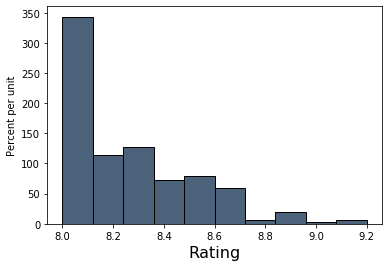

In [63]:
imdb_rating.hist()

You can control characteristics about the histogram using parameters such as `bins`.

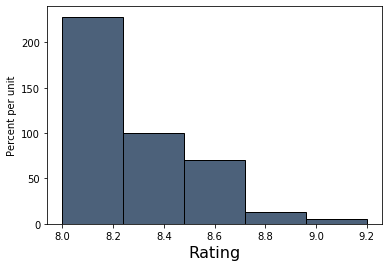

In [64]:
imdb_rating.hist(bins = 5)

Another visualization you can use for numerical data is a boxplot. As you might be able to guess, you can create this using the `boxplot` method. The data must be in a similar format.

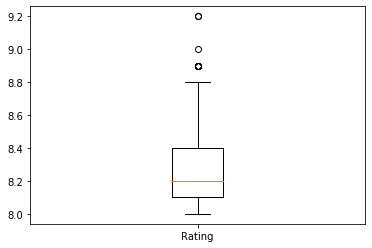

In [65]:
imdb_rating.boxplot()

### Bar Chart

To make bar charts, we first need to create the summaries of the groups that we want to graph. Remember: bar charts are used for categorical variables. This means that we want to get the **counts** for each **category** in that variable. We can do this using the `group` method. 

In [66]:
movies_by_decade = imdb.group('Decade')
movies_by_decade

Decade,count
1920,4
1930,7
1940,14
1950,30
1960,22
1970,21
1980,31
1990,42
2000,50
2010,29


We take this table and use the `barh` method, specifying which variable we want to create the graph of.

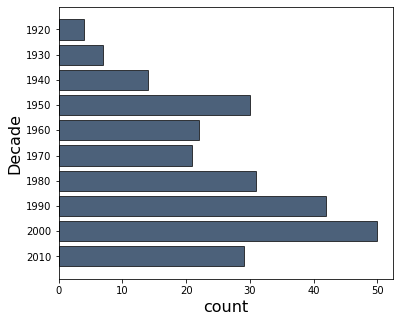

In [67]:
movies_by_decade.barh('Decade')

<font color = 'red'>**Question 7. Create a bar graph of the number of movies that had a rating above 8 or below 8.**</font>

To create a bar chart with multiple categories, we can use the `pivot` method to create a contingency table and use that instead of the `group` method.

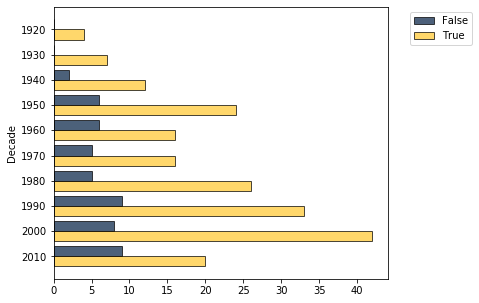

In [71]:
imdb.pivot('above_8','Decade').barh('Decade')

### Line Graph

Let's say we want to look at the change in movie ratings over time. To investigate this, we'll plot the mean rating over time. 

First, we need to get the data in the form we want it. We want a column with the different decades in our dataset (the x-axis) as well as a column with the mean rating for that decade (the y-axis). To obtain a table with this data, we can use the `group` method, using `collect = np.mean` as a parameter.

In [72]:
rating_by_decade = imdb.select('Decade','Rating').group('Decade', collect = np.mean)
rating_by_decade

Decade,Rating mean
1920,8.25
1930,8.27143
1940,8.25714
1950,8.23333
1960,8.23182
1970,8.30952
1980,8.24194
1990,8.35714
2000,8.26
2010,8.2


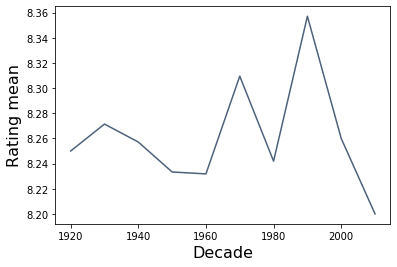

In [73]:
# The variable to go on the x-axis is specified as a parameter
rating_by_decade.plot('Decade')

## <font color = 'red'>**Questions: Manipulating Data and Making Visualizations**</font>

**Question 1.** What is the distribution of the number of votes that the movies got? What is the shape (number of modes, skewed vs. symmetric)? Use visualizations to show this.

*Hint:* Think about what graphs and numerical statistics would be best for describing this. What type of variable is votes? How would you best describe it?

**Question 2.** Recall that we made a table called `population` earlier in the lab. Create a visualization to show the population over time. 